In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the csv files
movie = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# joining the dataset
df = pd.merge(ratings,movie,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
# Cleaning the movie
import re
df['title'] = df['title'].apply(lambda x: re.sub(r'\s\(\d{4}\)','',x))

In [7]:
# make the basket of movie by userid
movie_baskets = df.groupby('userId')['title'].apply(list).reset_index()
movie_baskets.head()

,userId,title
0,1,"[Toy Story, Grumpier Old Men, Heat, Seven (a.k..."
1,2,"[Shawshank Redemption, The, Tommy Boy, Good Wi..."
2,3,"[Dangerous Minds, Schindler's List, Courage Un..."
3,4,"[Get Shorty, Twelve Monkeys (a.k.a. 12 Monkeys..."
4,5,"[Toy Story, Get Shorty, Babe, Dead Man Walking..."


In [8]:
# combine all movies in one big string
all_movies = ' '.join([movie for sublist in movie_baskets['title'] for movie in sublist])

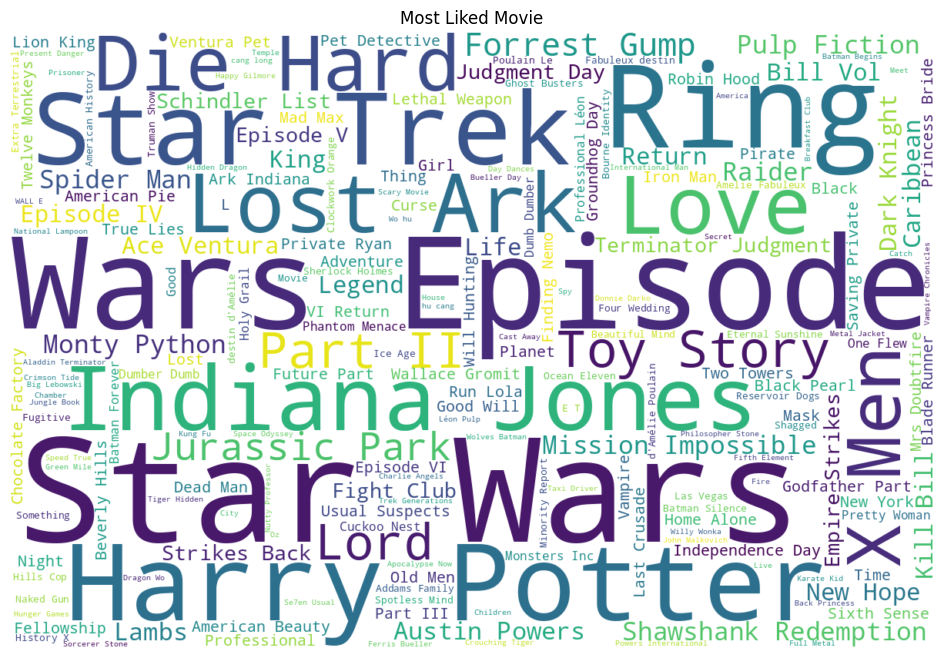

In [9]:
# Displaying the wordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=1200,height=800,background_color='white').generate(all_movies)

# Display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Liked Movie')
plt.show()

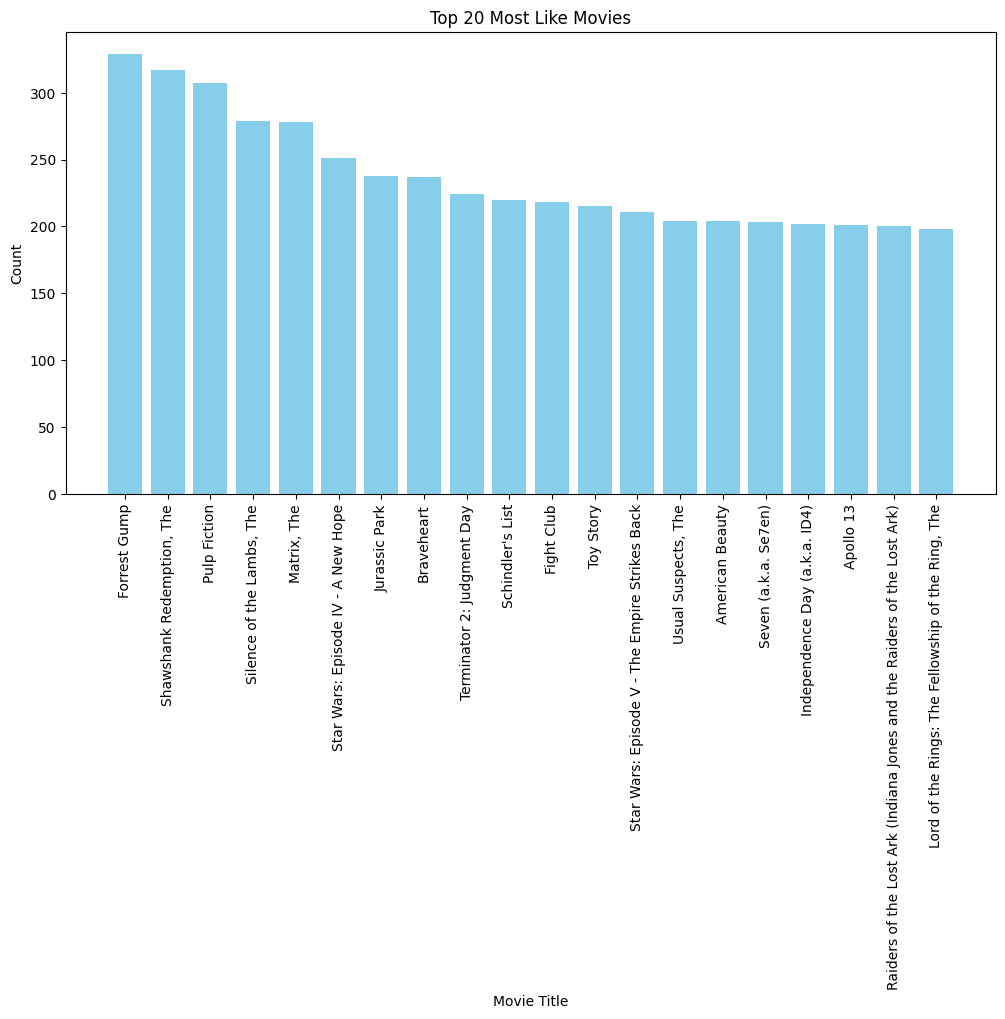

In [10]:
# Top most liked movies
from collections import Counter
# count frequency of each move
movie_counts = Counter([movie for sublist in movie_baskets['title'] for movie in sublist])
#Get top 20 movies
top_movies = dict(movie_counts.most_common(20))
# plot
plt.figure(figsize=(12,6))
plt.bar(top_movies.keys(),top_movies.values(),color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 20 Most Like Movies')
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.show()

In [11]:
movie_baskets.head()

,userId,title
0,1,"[Toy Story, Grumpier Old Men, Heat, Seven (a.k..."
1,2,"[Shawshank Redemption, The, Tommy Boy, Good Wi..."
2,3,"[Dangerous Minds, Schindler's List, Courage Un..."
3,4,"[Get Shorty, Twelve Monkeys (a.k.a. 12 Monkeys..."
4,5,"[Toy Story, Get Shorty, Babe, Dead Man Walking..."


In [12]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_arry = te.fit_transform(movie_baskets['title'])
df = pd.DataFrame(te_arry,columns=te.columns_)

In [13]:
df.head()

,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Getting the movie frequency with atleast minimum support 0.2
from mlxtend.frequent_patterns import apriori, association_rules
frequent_movies = apriori(df,min_support=0.1,use_colnames=True)
print(frequent_movies)

         support                                           itemsets
0       0.178689                            (2001: A Space Odyssey)
1       0.131148                                              (300)
2       0.121311                          (40-Year-Old Virgin, The)
3       0.101639                                       (Abyss, The)
4       0.263934                       (Ace Ventura: Pet Detective)
...          ...                                                ...
120604  0.101639  (Star Wars: Episode VI - Return of the Jedi, J...
120605  0.100000  (Star Wars: Episode VI - Return of the Jedi, J...
120606  0.101639  (Star Wars: Episode VI - Return of the Jedi, J...
120607  0.101639  (Star Wars: Episode VI - Return of the Jedi, J...
120608  0.103279  (Star Wars: Episode VI - Return of the Jedi, S...

[120609 rows x 2 columns]


In [15]:
# Rules Based on Confidence
rules = association_rules(frequent_movies,metric='confidence',min_threshold=0.5)

In [16]:
print(rules)

                                               antecedents  \
0                                                  (Alien)   
1                                  (2001: A Space Odyssey)   
2                                                 (Aliens)   
3                                  (2001: A Space Odyssey)   
4                                  (2001: A Space Odyssey)   
...                                                    ...   
2432466  (Lord of the Rings: The Return of the King, Th...   
2432467  (Lord of the Rings: The Return of the King, Th...   
2432468  (Fight Club, Star Wars: Episode V - The Empire...   
2432469  (Star Wars: Episode V - The Empire Strikes Bac...   
2432470  (Lord of the Rings: The Fellowship of the Ring...   

                                               consequents  \
0                                  (2001: A Space Odyssey)   
1                                                  (Alien)   
2                                  (2001: A Space Odyssey)   
3      

In [17]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                               antecedents  \
0                                                  (Alien)   
1                                  (2001: A Space Odyssey)   
2                                                 (Aliens)   
3                                  (2001: A Space Odyssey)   
4                                  (2001: A Space Odyssey)   
...                                                    ...   
2432466  (Lord of the Rings: The Return of the King, Th...   
2432467  (Lord of the Rings: The Return of the King, Th...   
2432468  (Fight Club, Star Wars: Episode V - The Empire...   
2432469  (Star Wars: Episode V - The Empire Strikes Bac...   
2432470  (Lord of the Rings: The Fellowship of the Ring...   

                                               consequents   support  \
0                                  (2001: A Space Odyssey)  0.124590   
1                                                  (Alien)  0.124590   
2                                  (200

In [18]:
# Recommendation function to return movies
# watched_movie = movie you watch , rules = dataframe of association rules and top_n = the top n number of movie you want
def recommend_movies(watched_movie,rules_df,top_n=5):
  # Looking at rules where the watched movie is in antecedents
  # Correctly filter rows where the watched_movie is in the 'antecedents' frozenset
  matching_rules = rules_df[rules_df['antecedents'].apply(lambda x: watched_movie in x)]

  if matching_rules.empty:
    return ["No recommendation found for this movie"]
  # Sort by Confidence
  sorted_rules = matching_rules.sort_values(by='confidence',ascending=False)
  #Extract consequents (movies to recommend)
  recommend_movies = []
  # Correcting the typo in iterrows
  for _,row in sorted_rules.iterrows():
    recommend_movies.extend(list(row['consequents']))
  # Remove the Duplicates while preserving order and limit to top_n
  recommend_movies = list(dict.fromkeys(recommend_movies))[:top_n]
  return recommend_movies

In [21]:
recommend_movies("Fight Club", rules, top_n=3)

['Star Wars: Episode VI - Return of the Jedi',
 'Lord of the Rings: The Fellowship of the Ring, The',
 'Matrix, The']